Michael Bernard

CPSC222

May 5, 2022

Description: Final Project

# Introduction

In this project I will be analyzing my data from the Health app on my iPhone as well as Spokane, WA weather data to see if there is any correlation between the two. Additionally, I will be taking a close look at the data to see if the day of the week effects my walking patterns.

* __1.a__- This project is important to me because I try to prioritize my health and I feel as though I sometimes have slumps where I do not move as much as I should. I also feel that the weather has an effect on my motivation which causes me to stay in my room more.
* __1.b__- Both sets of data that I will be using are in the form of CSV files.
* __1.c__- There are two tables of data coming from two different data sets. These tables are the data recorded from the Health app on my iPhone as well as data that was downloaded from [visualcrossing](https://www.visualcrossing.com/weather/weather-data-services#).
    * __1.c.i.__- The data from the Health app is automatically recorded daily and I exported it from my phone using an app called Health Auto Export. The data from visualcrossing is gathered from nearby weather stations.
    * __1.c.ii__- Each table has 90 instances as the data spans for 90 days.
* __1.d__ - The attributes included in the health data are: Flights Climbed (count),Walking + Running Distance (mi),Walking Asymmetry Percentage (%),Walking Double Support Percentage (%),Walking Speed (mi/hr),Walking Step Length (in), and Day of Week. There is a long list of attributes contained in the weather data but the main ones I will focus on are: tempmax,tempmin,temp,precip,precipcover,preciptype,snow,windspeed,cloudcover,sunrise,sunset,conditions,and description. I plan to describe these attributes in greater detail as they become relavent to the work shown.
* __1.e__- I will be classifying the data into weekdays and weekend days and potentially classifying the data into cold and warm days.
* __1.f__- The potential impacts of the results are that I become more conscious of my daily movement based on the day of the week as well as the weather. There is a chance that I find irregularities in my walking asymmetry which could lead to other discoveries about my own health.
* __1.g__- The stakeholders in this project include myself, my classmates, Dr. Sprint, the TA, as well as any other people who may use the result of this data as information for their own health patterns.

In [1]:
import numpy as np
import pandas as pd
import data
from scipy import stats
import matplotlib.pyplot as plt
import importlib
importlib.reload(data)

# print(data.df)

dataset_len = len(data.health_df)
print("The data set contains", dataset_len,"days of data.")

avg_steps = data.health_df["Steps"].mean()
print("The average steps per day is:", avg_steps)
avg_dist = data.health_df["Distance"].mean()
print("The average distance per day in miles is:", avg_dist)
avg_flights = data.health_df["FC"].mean()
print("The average flights climbed per day is:", avg_flights)
median_asymmetry = data.health_df["Asymmetry"].median()
print("The median asymmetry percentage per day is:", median_asymmetry)
avg_wds = data.health_df["WDS"].mean()
print("The average walking double support percentage per day is:", avg_wds)
avg_speed = data.health_df["Speed"].mean()
print("The average walking speed per day in MPH is:", avg_speed)
avg_step_len = data.health_df["Step Length"].mean() # figure out why the column for this isn't changing
print("The average step length per day in inches is:", avg_step_len)



The data set contains 91 days of data.
The average steps per day is: 6314.241758241758
The average distance per day in miles is: 2.407472527472527
The average flights climbed per day is: 17.142857142857142
The median asymmetry percentage per day is: 0.34650000000000003
The average walking double support percentage per day is: 27.81582417582417
The average walking speed per day in MPH is: 2.794395604395605
The average step length per day in inches is: 25.77758241758241


## Grouping Data

[0.094, 0.628, 0.2, 0.35, 0.267, 0.343, 0.8845000000000001]


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

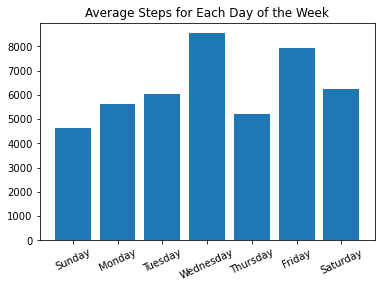

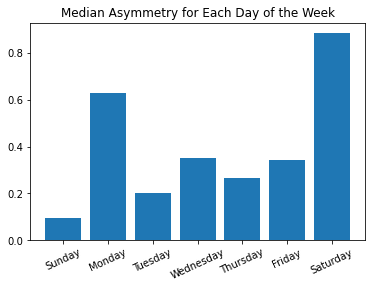

In [30]:
grouped_by_day = data.health_df.groupby("Day of Week")
friday_df = grouped_by_day.get_group("Friday")
saturday_df = grouped_by_day.get_group("Saturday")
sunday_df = grouped_by_day.get_group("Sunday")
monday_df = grouped_by_day.get_group("Monday")
tuesday_df = grouped_by_day.get_group("Tuesday")
wednesday_df = grouped_by_day.get_group("Wednesday")
thursday_df = grouped_by_day.get_group("Thursday")

friday_avg_steps = friday_df["Steps"].mean()
saturday_avg_steps = saturday_df["Steps"].mean()
sunday_avg_steps = sunday_df["Steps"].mean()
monday_avg_steps = monday_df["Steps"].mean()
tuesday_avg_steps = tuesday_df["Steps"].mean()
wednesday_avg_steps = wednesday_df["Steps"].mean()
thursday_avg_steps = thursday_df["Steps"].mean()


friday_med_asym = friday_df["Asymmetry"].median()
saturday_med_asym = saturday_df["Asymmetry"].median()
sunday_med_asym = sunday_df["Asymmetry"].median()
monday_med_asym = monday_df["Asymmetry"].median()
tuesday_med_asym = tuesday_df["Asymmetry"].median()
wednesday_med_asym = wednesday_df["Asymmetry"].median()
thursday_med_asym = thursday_df["Asymmetry"].median()

daily_steps = [sunday_avg_steps, monday_avg_steps, tuesday_avg_steps, wednesday_avg_steps, thursday_avg_steps, friday_avg_steps, saturday_avg_steps]
days = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday']
averages = pd.DataFrame()
day_of_week = pd.DataFrame()
averages['Day of Week'] = days
averages['Average Steps'] = daily_steps

# chart for steps
plt.figure() # to create a new "current" figure
plt.bar(averages["Day of Week"], averages["Average Steps"])
plt.title("Average Steps for Each Day of the Week")
plt.xticks(rotation=25)

daily_asym = [sunday_med_asym, monday_med_asym, tuesday_med_asym, wednesday_med_asym, thursday_med_asym, friday_med_asym, saturday_med_asym]
print(daily_asym)
averages['Median Asymmetry'] = daily_asym
# chart for Asymmetry
plt.figure() # to create a new "current" figure
plt.bar(averages["Day of Week"], averages['Median Asymmetry'])
plt.title("Median Asymmetry for Each Day of the Week")
plt.xticks(rotation=25)

## Hypothesis Testing
#### Is there a difference in the amount of activity on Friday and Saturday vs the week days?

In [37]:
# first need to get data

# friday_df = grouped_by_day.get_group("Friday")
# saturday_df = grouped_by_day.get_group("Saturday")
weekend_df = pd.concat([friday_df, saturday_df])
# print(weekend_df)
# sunday_df = grouped_by_day.get_group("Sunday")
# monday_df = grouped_by_day.get_group("Monday")
# tuesday_df = grouped_by_day.get_group("Tuesday")
# wednesday_df = grouped_by_day.get_group("Wednesday")
# thursday_df = grouped_by_day.get_group("Thursday")
weekday_df = pd.concat([sunday_df, monday_df, tuesday_df, wednesday_df, thursday_df])
# print(weekday_df)

# MOVE THIS LATER
def hypothesis_test(group_t_val, pval):
    print("t:", group_t_val, "pval:", pval)
    alpha = .05
    if pval < alpha:
        print("reject H0")
    else:
        print("do not reject H0")

xbar_weekend = np.mean(weekend_df)
xbar_weekday = np.mean(weekday_df)
s_weekend = np.std(weekend_df, ddof=1)
s_weekday = np.std(weekday_df, ddof=1)
n_weekend = len(weekend_df)
n_weekday = len(weekday_df)
df = n_weekday + n_weekend - 2

sp2 = ((n_weekend - 1) * s_weekend ** 2 + (n_weekday - 1) * s_weekday ** 2) / (df)
t = (xbar_weekend - xbar_weekday) / np.sqrt(sp2 * (1 / n_weekend + 1 / n_weekday))
# print("t:", t)


# change to dependent tests

group_t_val = (xbar_weekend - xbar_weekday) / np.sqrt(sp2 * (1 / n_weekend + 1 / n_weekday))
group_t_val, pval = stats.ttest_ind(weekday_df["Steps"], weekend_df["Steps"])
# pval /= 2 # divide by two because 1 rejection region
print("HYPO TEST FOR STEPS:")
hypothesis_test(group_t_val, pval)
print()

# ttest_rel
# compare first 12 fridays to first 12 mondays or average weekend and weekday steps
# 
group_t_val, pval = stats.ttest_ind(weekday_df["FC"], weekend_df["FC"])
print("HYPO TEST FOR FC:")
hypothesis_test(group_t_val, pval)
print()
group_t_val, pval = stats.ttest_ind(weekday_df["Distance"], weekend_df["Distance"])
print("HYPO TEST FOR DISTANCE:")
hypothesis_test(group_t_val, pval)

print()
group_t_val, pval = stats.ttest_ind(weekday_df["WDS"], weekend_df["WDS"])
print("HYPO TEST FOR WDS:")
hypothesis_test(group_t_val, pval)

print()
group_t_val, pval = stats.ttest_ind(weekday_df["Speed"], weekend_df["Speed"])
print("HYPO TEST FOR SPEED:")
hypothesis_test(group_t_val, pval)

print()
group_t_val, pval = stats.ttest_ind(weekday_df["Step Length"], weekend_df["Step Length"])
print("HYPO TEST FOR Step Length:")
hypothesis_test(group_t_val, pval)






HYPO TEST FOR STEPS:
t: -1.8342554841669285 pval: 0.0699576375089759
do not reject H0

HYPO TEST FOR FC:
t: -1.5801323223134376 pval: 0.1176242149514772
do not reject H0

HYPO TEST FOR DISTANCE:
t: -1.8957450506199218 pval: 0.061238799646277625
do not reject H0

HYPO TEST FOR WDS:
t: -1.3254112838822776 pval: 0.18842711553194225
do not reject H0

HYPO TEST FOR SPEED:
t: 1.8988567312773925 pval: 0.060823057420118745
do not reject H0

HYPO TEST FOR Step Length:
t: 2.062427223315454 pval: 0.04208209006382106
reject H0


# Data Analysis